In [109]:
import warnings                               
warnings.filterwarnings('ignore')

import numpy as np                              
import pandas as pd 
from random import seed
from random import random
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
import datetime 
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

### 6. The random walk {St,t = 0,1,...,n} is obtained by cumulatively summing iid random variables. Define S0 = 0,St =X1+X2+...+Xt,t=1,2,...,n and {Xt} is an IID binary process with P(Xt =1)=0.7,P(Xt =−1)=0.3 


### (a) Write Python code to simulate this process with n = 1000. Do not provide the data in the homework answer.


In [120]:

seed(-1)
n = 1000
random_walk = []
if random() >= 0.5: 
    random_walk(random_walk.append(1))
else:
    random_walk.append(-1)
    
for x in range(1, n):
    if random() < 0.5:
        move = -1 
    else: 
        move = 1
    stored = random_walk[x-1] + move
    random_walk.append(stored)


### (b) Use the simulated data to draw a time series line plot, attach the plot in the pdf file, and describe the trend you have observed.

### ANS--> There seems a sort of linear trend that has a long-term increase in data with noise and some sort of seasonality. 

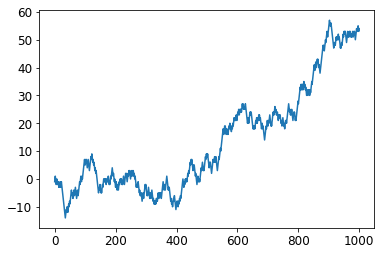

In [121]:
plt.plot(random_walk)
plt.show()

### (c) Draw two plots of the smoothed trend using MA filter with k=30 and k=365 and attach the plots in the pdf file. What have you observed about the smoothness and trend in the two plots?

#### After smoothing is applied using MA filter with k=30, the plot became much smoother and the noise in the output has reduced a lot.When MA filter with k=365, is applied though the noise is almost zero, the transitions are blunted out drastically. The trend seems linear which increases over time. 

In [133]:
random_df = pd.DataFrame(random_walk) 
# random_df 

In [129]:
# random_df.rolling(window=30, center=True).mean()

In [134]:
def plotMovingAverage(series, window, plot_actual=False, scale=1.96):

    rolling_mean = series.rolling(window=window,center=True).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")
    
    if plot_actual:
        plt.plot(series[window:], label="Actual values")
        
    plt.legend(loc="upper left") 
    plt.grid(True)

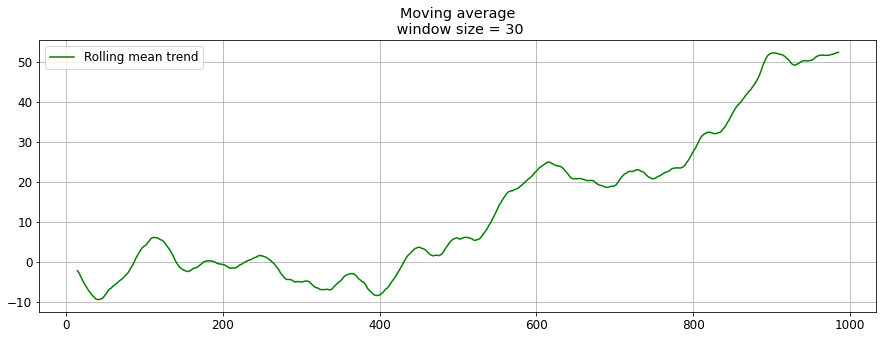

In [135]:
plotMovingAverage(random_df, 30) 

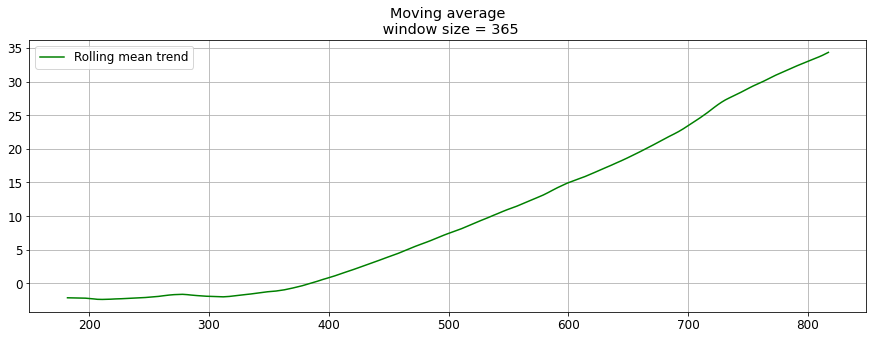

In [136]:
plotMovingAverage(random_df, 365) 

In [84]:
passenger = pd.read_csv('airline-passengers.csv')
passenger.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [85]:
print(passenger.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
None


In [86]:
passenger.Month=passenger.Month.apply(lambda x:datetime.datetime.strptime(x,'%Y-%m'))


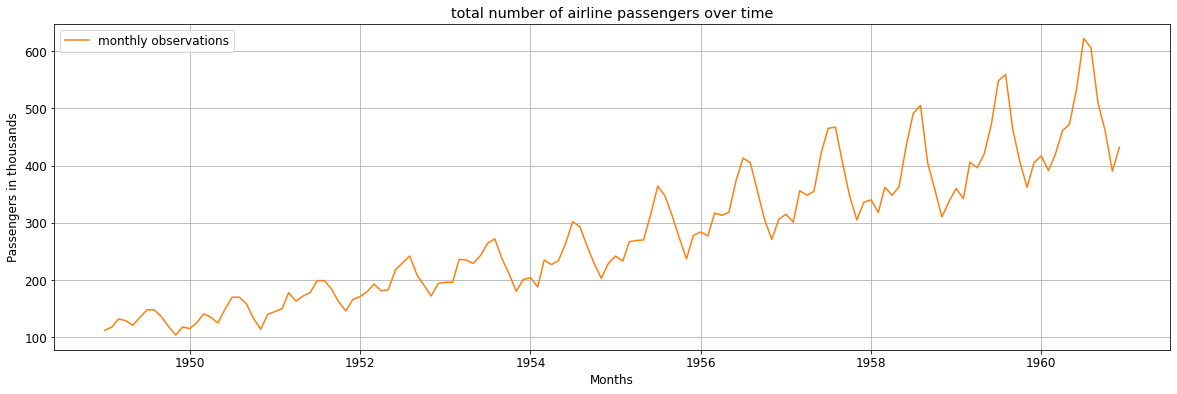

In [87]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(20, 6))

# Specify how our lines should look
ax.plot(passenger.Month, passenger.Passengers, color='tab:orange', label='monthly observations')



ax.set_xlabel('Months')
ax.set_ylabel('Passengers in thousands')
ax.set_title('total number of airline passengers over time')
ax.grid(True)
ax.legend(loc='upper left');


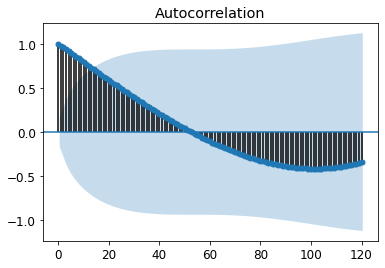

In [88]:

plot_acf(passenger.Month ,lags=120)
plt.show()

### a) (a) Draw the time series plot and ACF plot. Explain why the general trend of the sample autocorrelation in ACF plot is decreasing to negative and then increase to around 0 when lag h is increasing, and why there are "jumps" around lags h = 12,24,36,... based on the time series plot.

### ANS--> The plot is explaining the Trend plus seasonality in the plot above about the total number of airline passengers over time. In the Autocorrelation plot Line starts close to positive 1 in the beginning when lag h is close to zero and starts to decrease down to negative as h increases as the values of X are close to X-bar or mean when they are subtracted by the mean then they become close to zero, as h also goes up around the mean there will be a change in sign i.e before and after the mean that makes sample autocorrelation line to go towards negative.Then it starts to increase to around 0 when lag h is increasing there will be less data to be used at the top but bigger at the bottom then the number will be pulled back to zero. 

### ANS--> Additionally, there are "jumps" around lags h = 12,24,36,... based on the time series plot, because as the smooth line(general shape) indicates the trend and we see a litle Jumps happening in between along the line because of the seasonality happening every year(12 months). 

### (b) Again, based on the time series plot and the discussion above, choose the "model" and "freq" for classical decomposition and create the decomposition plot.

### ANS --> From the line plot above suggests that magnitude of the seasonality pattern around the trend seems to grow proportionally with time (the magnitude of change is getting bigger and bigger from year to year). This suggests that it is multiplicative with a frequency of 12(seasonality occurs every year or 12 months in the trend). 
### Model = multiplicative,freq=12

#### From the plot below we can see the seasonal pattern clearly. 

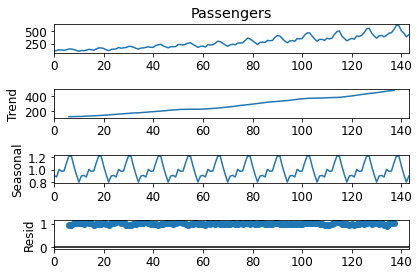

In [104]:
res = sm.tsa.seasonal_decompose(passenger.Passengers,freq=12,model="multiplicative")
fig=res.plot()